In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the cleaned dataset
combined_data = pd.read_csv('combined_data_cleaned.csv')

# Display basic information to verify the dataset
print("Dataset Info:")
print(combined_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40768 entries, 0 to 40767
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  40768 non-null  object 
 1   Address               35768 non-null  object 
 2   Bedrooms              40768 non-null  int64  
 3   Bathrooms             40768 non-null  int64  
 4   Province              40768 non-null  object 
 5   Population            40768 non-null  int64  
 6   Median_Family_Income  40768 non-null  float64
 7   Type                  40768 non-null  object 
 8   Garage                5000 non-null   float64
 9   Year_Built            5000 non-null   float64
 10  Lot_Area              32164 non-null  float64
 11  SqFt                  5000 non-null   float64
 12  Price                 40768 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 4.0+ MB
None


In [4]:
# Make a copy of the dataset for encoding
combined_encoded = combined_data.copy()

# Encode 'City' and 'Province' columns
label_encoders = {}
for col in ['City', 'Province']:
    le = LabelEncoder()
    combined_encoded[col] = le.fit_transform(combined_encoded[col])
    label_encoders[col] = le  # Store the encoder for later use

In [5]:
# Select numeric columns
numeric_and_encoded_data = combined_encoded.select_dtypes(include=['float64', 'int64'])

# Add encoded 'City' and 'Province' columns
numeric_and_encoded_data['City'] = combined_encoded['City']
numeric_and_encoded_data['Province'] = combined_encoded['Province']

# Display the columns in the numeric and encoded dataset for verification
print("Numeric and Encoded Data Columns:")
print(numeric_and_encoded_data.columns)

Numeric and Encoded Data Columns:
Index(['City', 'Bedrooms', 'Bathrooms', 'Province', 'Population',
       'Median_Family_Income', 'Garage', 'Year_Built', 'Lot_Area', 'SqFt',
       'Price'],
      dtype='object')


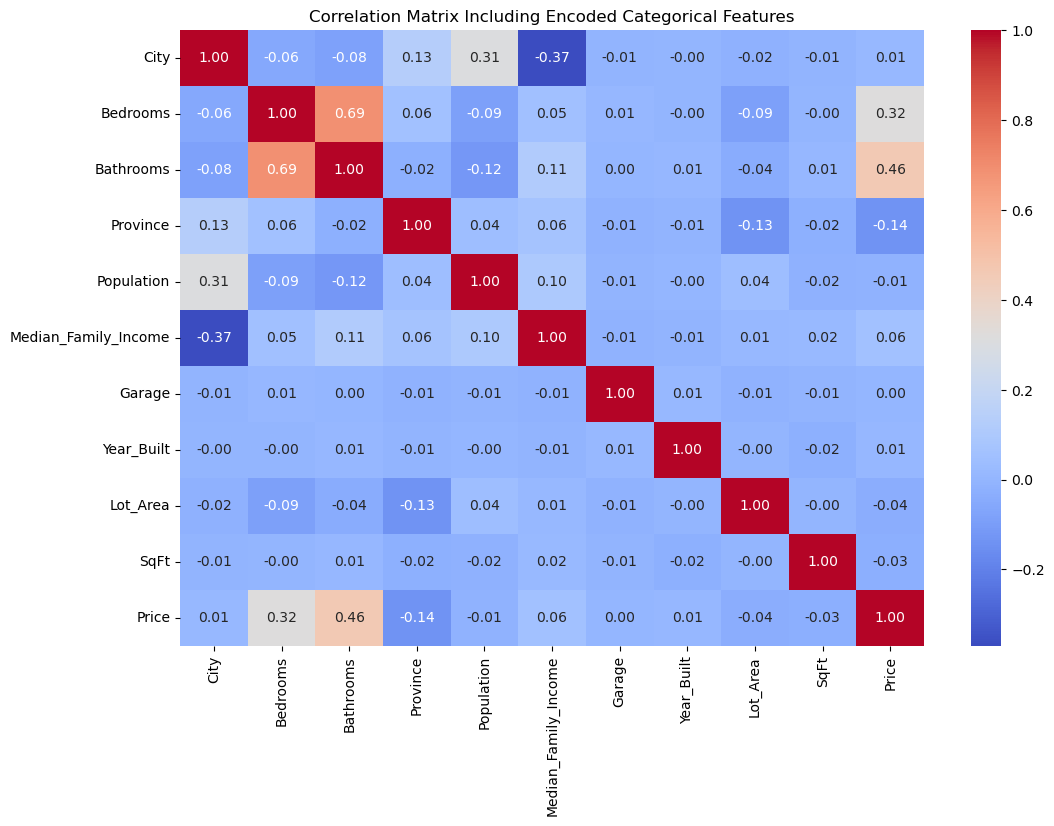

In [6]:
# Calculate the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_and_encoded_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix Including Encoded Categorical Features")
plt.show()

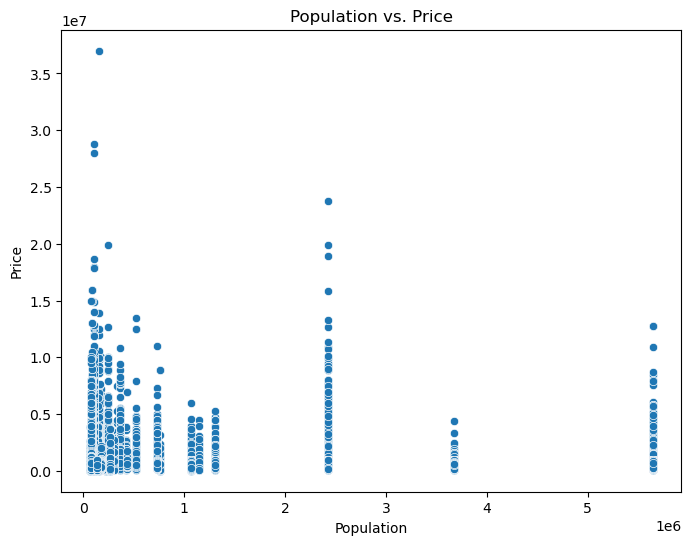

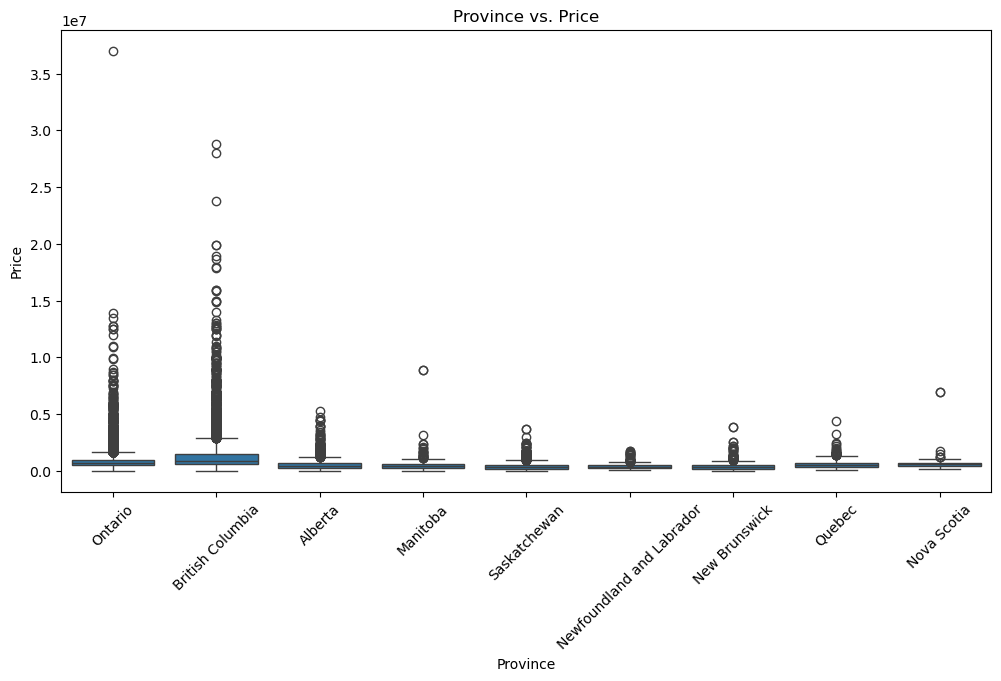

In [7]:
# Scatter plot for Population vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=combined_data['Population'], y=combined_data['Price'])
plt.title("Population vs. Price")
plt.xlabel("Population")
plt.ylabel("Price")
plt.show()

# Box plot for Province vs. Price
plt.figure(figsize=(12, 6))
sns.boxplot(x=combined_data['Province'], y=combined_data['Price'])
plt.title("Province vs. Price")
plt.xlabel("Province")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
# Load the cleaned dataset
combined_data = pd.read_csv('combined_data_cleaned.csv')

# Display basic information
print("Dataset Info:")
print(combined_data.info())

# Check for missing values
print("Missing Values:")
print(combined_data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40768 entries, 0 to 40767
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  40768 non-null  object 
 1   Address               35768 non-null  object 
 2   Bedrooms              40768 non-null  int64  
 3   Bathrooms             40768 non-null  int64  
 4   Province              40768 non-null  object 
 5   Population            40768 non-null  int64  
 6   Median_Family_Income  40768 non-null  float64
 7   Type                  40768 non-null  object 
 8   Garage                5000 non-null   float64
 9   Year_Built            5000 non-null   float64
 10  Lot_Area              32164 non-null  float64
 11  SqFt                  5000 non-null   float64
 12  Price                 40768 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 4.0+ MB
None
Missing Values:
City                        0

In [11]:
# Create a composite feature combining Province and City
combined_data['Province_City'] = combined_data['Province'] + "_" + combined_data['City'].astype(str)

In [12]:
# Map Province to its median Price
province_median_price = combined_data.groupby('Province')['Price'].median().to_dict()
combined_data['Province_Median_Price'] = combined_data['Province'].map(province_median_price)

# Drop the original Province column
combined_data.drop(columns=['Province'], inplace=True)

In [13]:
# Drop weak features like Garage, Lot_Area, and Year_Built
combined_data.drop(columns=['Garage', 'Lot_Area', 'Year_Built'], inplace=True)

In [14]:
# Encode Province_City
le = LabelEncoder()
combined_data['Province_City'] = le.fit_transform(combined_data['Province_City'])

In [15]:
# Select numerical columns
numerical_cols = ['Bedrooms', 'Bathrooms', 'Population', 'Median_Family_Income', 'Province_Median_Price']
scaler = StandardScaler()

# Scale the numerical columns
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

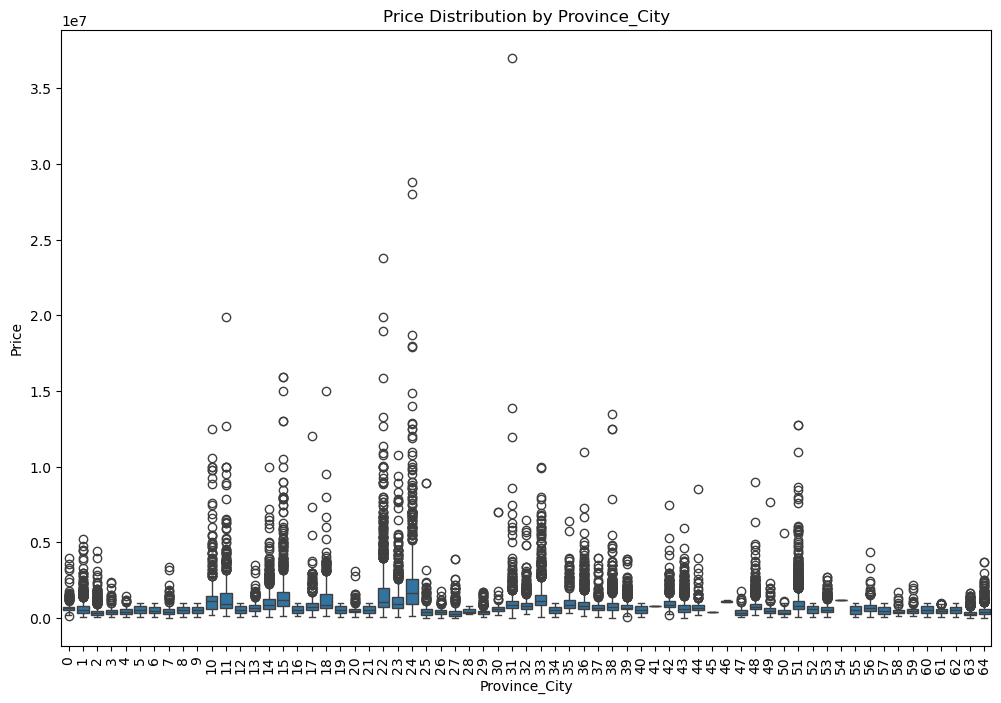

In [16]:
# Create a box plot for Price distribution across Province_City
plt.figure(figsize=(12, 8))
sns.boxplot(x='Province_City', y='Price', data=combined_data)
plt.title("Price Distribution by Province_City")
plt.xlabel("Province_City")
plt.ylabel("Price")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()

/var/folders/nq/174f2qcn6cl3hlkkbcr98vw00000gn/T/ipykernel_98480/1266665217.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province_City', y='mean', data=price_stats, palette='viridis')


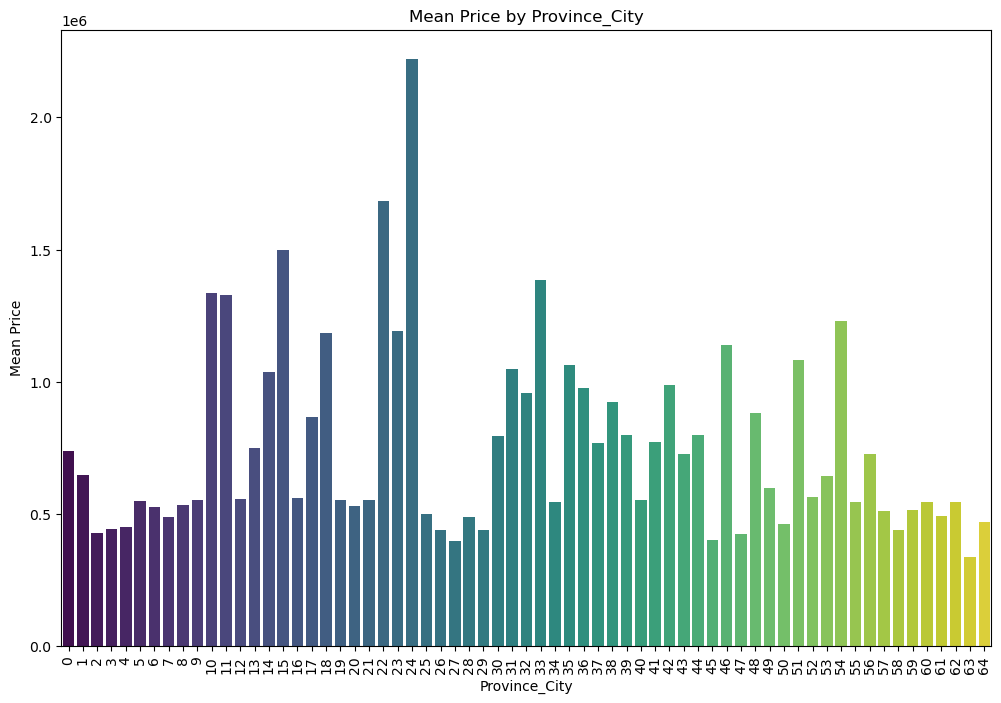

In [17]:
# Calculate mean and median Price for each Province_City
price_stats = combined_data.groupby('Province_City')['Price'].agg(['mean', 'median']).reset_index()

# Plot mean prices
plt.figure(figsize=(12, 8))
sns.barplot(x='Province_City', y='mean', data=price_stats, palette='viridis')
plt.title("Mean Price by Province_City")
plt.xlabel("Province_City")
plt.ylabel("Mean Price")
plt.xticks(rotation=90)
plt.show()

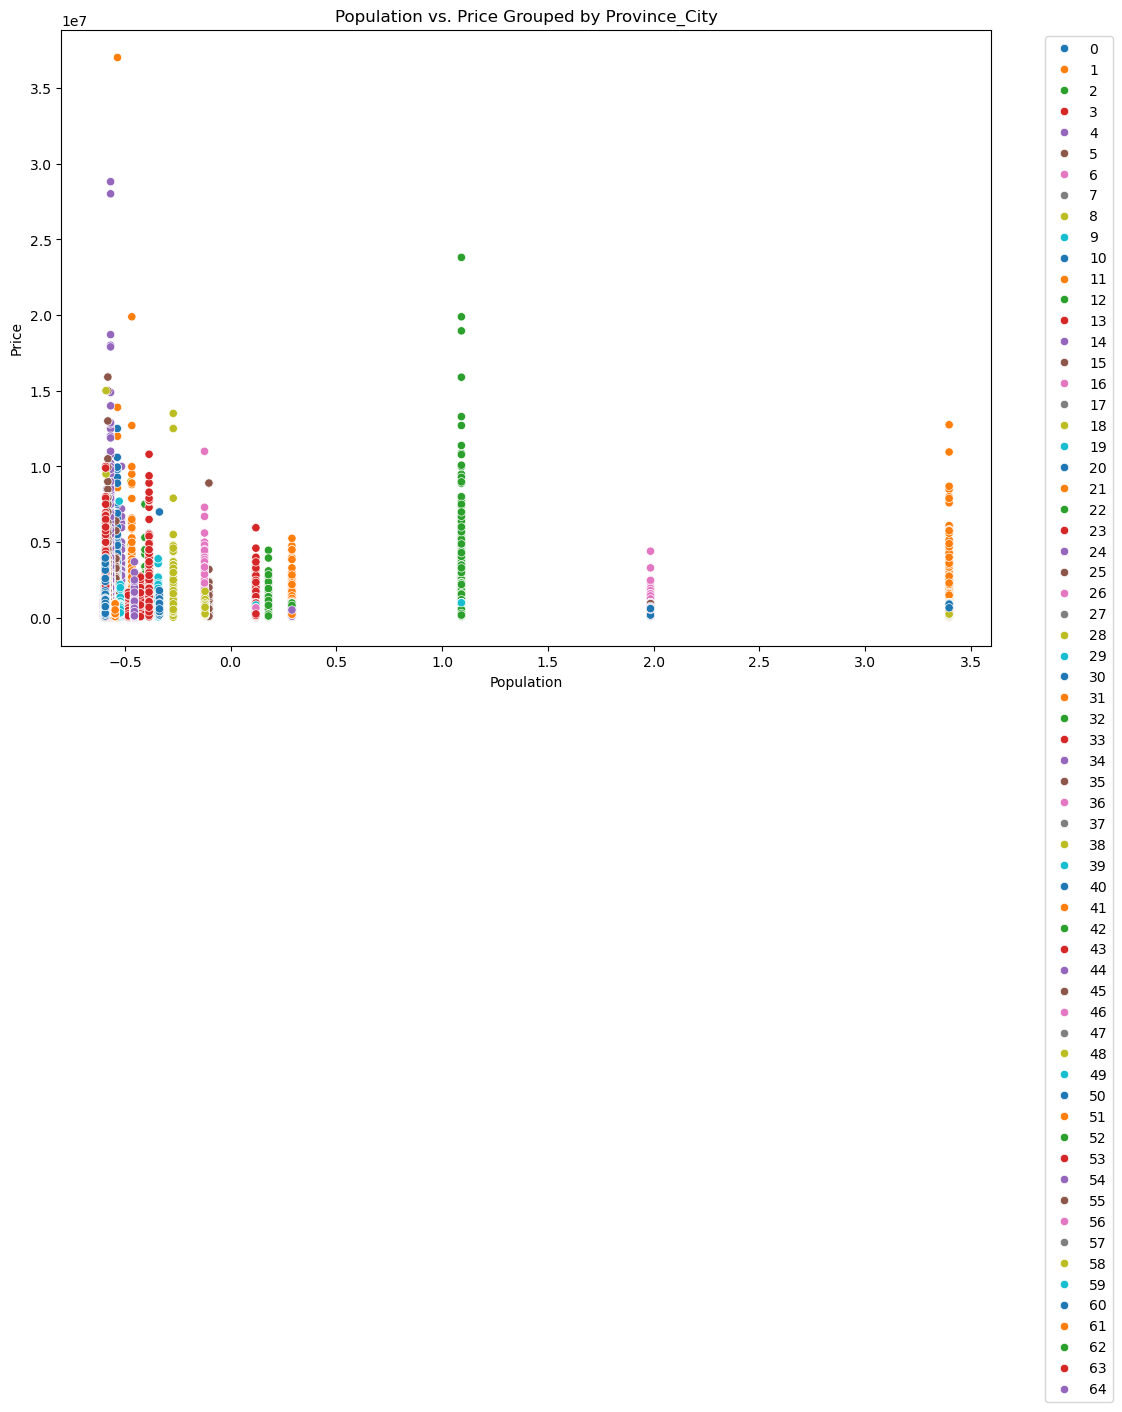

In [18]:
# Scatter plot for Population vs. Price, grouped by Province_City
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Population', y='Price', hue='Province_City', data=combined_data, palette='tab10')
plt.title("Population vs. Price Grouped by Province_City")
plt.xlabel("Population")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend
plt.show()

## Building our model now

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
# Load the dataset
combined_data = pd.read_csv('combined_data_cleaned.csv')

# Display basic information
print("Dataset Info:")
print(combined_data.info())

# Check the first few rows
print("First few rows:")
print(combined_data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40768 entries, 0 to 40767
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  40768 non-null  object 
 1   Address               35768 non-null  object 
 2   Bedrooms              40768 non-null  int64  
 3   Bathrooms             40768 non-null  int64  
 4   Province              40768 non-null  object 
 5   Population            40768 non-null  int64  
 6   Median_Family_Income  40768 non-null  float64
 7   Type                  40768 non-null  object 
 8   Garage                5000 non-null   float64
 9   Year_Built            5000 non-null   float64
 10  Lot_Area              32164 non-null  float64
 11  SqFt                  5000 non-null   float64
 12  Price                 40768 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 4.0+ MB
None
First few rows:
      City                  A

In [21]:
# Drop irrelevant columns
combined_data.drop(columns=['SqFt', 'Garage', 'Lot_Area', 'Year_Built', 'Address'], inplace=True, errors='ignore')

# Verify remaining columns
print("Remaining columns after dropping:")
print(combined_data.columns)

Remaining columns after dropping:
Index(['City', 'Bedrooms', 'Bathrooms', 'Province', 'Population',
       'Median_Family_Income', 'Type', 'Price'],
      dtype='object')


In [22]:
# Combine Province and City into Province_City
combined_data['Province_City'] = combined_data['Province'] + "_" + combined_data['City'].astype(str)

# Drop Province and City columns
combined_data.drop(columns=['Province', 'City'], inplace=True)

# Verify remaining columns
print("Remaining columns after dropping Province and City:")
print(combined_data.columns)


# Verify the new feature
print("Sample Province_City values:")
print(combined_data['Province_City'].head())

Remaining columns after dropping Province and City:
Index(['Bedrooms', 'Bathrooms', 'Population', 'Median_Family_Income', 'Type',
       'Price', 'Province_City'],
      dtype='object')
Sample Province_City values:
0    Ontario_Toronto
1    Ontario_Toronto
2    Ontario_Toronto
3    Ontario_Toronto
4    Ontario_Toronto
Name: Province_City, dtype: object


In [23]:
# Encode Type
le_type = LabelEncoder()
combined_data['Type'] = le_type.fit_transform(combined_data['Type'])

# Encode Province_City
le_province_city = LabelEncoder()
combined_data['Province_City'] = le_province_city.fit_transform(combined_data['Province_City'])

# Verify encoding
print("Encoded categorical columns:")
print(combined_data[['Type', 'Province_City']].head())

Encoded categorical columns:
   Type  Province_City
0     2             51
1     2             51
2     2             51
3     2             51
4     2             51


In [24]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['Bedrooms', 'Bathrooms', 'Population', 'Median_Family_Income']

# Standardize numerical columns
scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Verify scaling
print("Statistics of standardized numerical columns:")
print(combined_data[numerical_cols].describe())

Statistics of standardized numerical columns:
           Bedrooms     Bathrooms    Population  Median_Family_Income
count  4.076800e+04  4.076800e+04  4.076800e+04          4.076800e+04
mean   4.461807e-17 -1.673178e-16 -2.230903e-17         -5.911894e-16
std    1.000012e+00  1.000012e+00  1.000012e+00          1.000012e+00
min   -1.915634e+00 -1.857646e+00 -6.004943e-01         -2.323319e+00
25%   -7.374935e-01 -3.519696e-01 -5.480144e-01         -5.663399e-01
50%   -1.484235e-01 -3.519696e-01 -4.553329e-01         -5.459832e-02
75%    4.406466e-01  4.008686e-01  1.193303e-01          6.277237e-01
max    6.229300e+01  4.255981e+01  3.397459e+00          3.698173e+00


In [25]:
# Define features (X) and target (y)
X = combined_data.drop(columns=['Price'])  # Features
y = combined_data['Price']  # Target

# Verify shapes
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (40768, 6)
Target shape: (40768,)


In [26]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (32614, 6)
Testing data shape: (8154, 6)


In [27]:
# Check for missing values
print("Missing values in training data:")
print(X_train.isnull().sum())

print("Missing values in testing data:")
print(X_test.isnull().sum())

# Check data types
print("Data types in training data:")
print(X_train.dtypes)

Missing values in training data:
Bedrooms                0
Bathrooms               0
Population              0
Median_Family_Income    0
Type                    0
Province_City           0
dtype: int64
Missing values in testing data:
Bedrooms                0
Bathrooms               0
Population              0
Median_Family_Income    0
Type                    0
Province_City           0
dtype: int64
Data types in training data:
Bedrooms                float64
Bathrooms               float64
Population              float64
Median_Family_Income    float64
Type                      int64
Province_City             int64
dtype: object


## Training

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Linear Regression Results:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Linear Regression Results:
Train RMSE: 861080.62
Test RMSE: 795150.81
R^2 Score: 0.25


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

# Make predictions
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

# Evaluate the model
train_rmse_rf = mean_squared_error(y_train, y_train_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_rf, squared=False)
r2_rf = r2_score(y_test, y_test_rf)

# Print evaluation metrics
print(f"Random Forest Results:")
print(f"Train RMSE: {train_rmse_rf:.2f}")
print(f"Test RMSE: {test_rmse_rf:.2f}")
print(f"R^2 Score: {r2_rf:.2f}")

Random Forest Results:
Train RMSE: 668292.37
Test RMSE: 660475.47
R^2 Score: 0.48


In [60]:
from xgboost import XGBRegressor

# Initialize and train the XGBoost model
xgb = XGBRegressor(random_state=42, n_estimators=100, max_depth=10, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Make predictions
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

# Evaluate the model
train_rmse_xgb = mean_squared_error(y_train, y_train_xgb, squared=False)
test_rmse_xgb = mean_squared_error(y_test, y_test_xgb, squared=False)
r2_xgb = r2_score(y_test, y_test_xgb)

# Print evaluation metrics
print(f"XGBoost Results:")
print(f"Train RMSE: {train_rmse_xgb:.2f}")
print(f"Test RMSE: {test_rmse_xgb:.2f}")
print(f"R^2 Score: {r2_xgb:.2f}")

XGBoost Results:
Train RMSE: 644062.81
Test RMSE: 664052.79
R^2 Score: 0.48


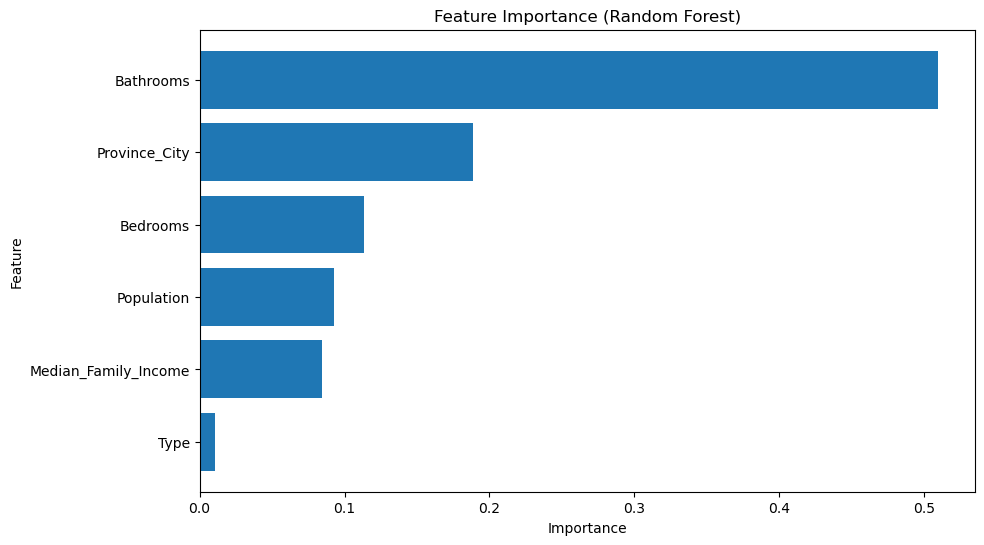

In [30]:
import matplotlib.pyplot as plt

# Feature importance from Random Forest
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

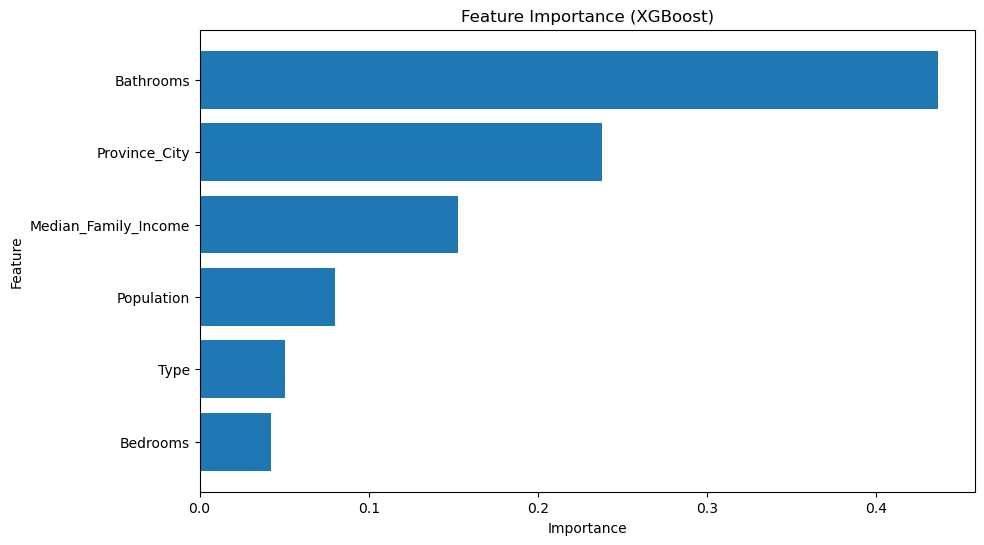

In [62]:
# Feature importance from XGBoost
xgb_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_importances['Feature'], xgb_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis()
plt.show()

## Hyperparameter tuning

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
print("Best Negative Mean Squared Error for Random Forest:", best_score_rf)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Negative Mean Squared Error for Random Forest: -541299404656.99347


In [32]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,
                               cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best Parameters for XGBoost:", best_params_xgb)
print("Best Negative Mean Squared Error for XGBoost:", best_score_xgb)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Negative Mean Squared Error for XGBoost: -534428665745.4655


In [33]:
# Retrain Random Forest with best parameters
rf_tuned = RandomForestRegressor(random_state=42, **best_params_rf)
rf_tuned.fit(X_train, y_train)

# Evaluate on test set
y_test_rf_tuned = rf_tuned.predict(X_test)
test_rmse_rf_tuned = mean_squared_error(y_test, y_test_rf_tuned, squared=False)
r2_rf_tuned = r2_score(y_test, y_test_rf_tuned)

print("Tuned Random Forest Results:")
print(f"Test RMSE: {test_rmse_rf_tuned:.2f}, R^2 Score: {r2_rf_tuned:.2f}")

Tuned Random Forest Results:
Test RMSE: 653324.51, R^2 Score: 0.50


In [34]:
# Retrain XGBoost with best parameters
xgb_tuned = XGBRegressor(random_state=42, **best_params_xgb)
xgb_tuned.fit(X_train, y_train)

# Evaluate on test set
y_test_xgb_tuned = xgb_tuned.predict(X_test)
test_rmse_xgb_tuned = mean_squared_error(y_test, y_test_xgb_tuned, squared=False)
r2_xgb_tuned = r2_score(y_test, y_test_xgb_tuned)

print("Tuned XGBoost Results:")
print(f"Test RMSE: {test_rmse_xgb_tuned:.2f}, R^2 Score: {r2_xgb_tuned:.2f}")

Tuned XGBoost Results:
Test RMSE: 652951.80, R^2 Score: 0.50


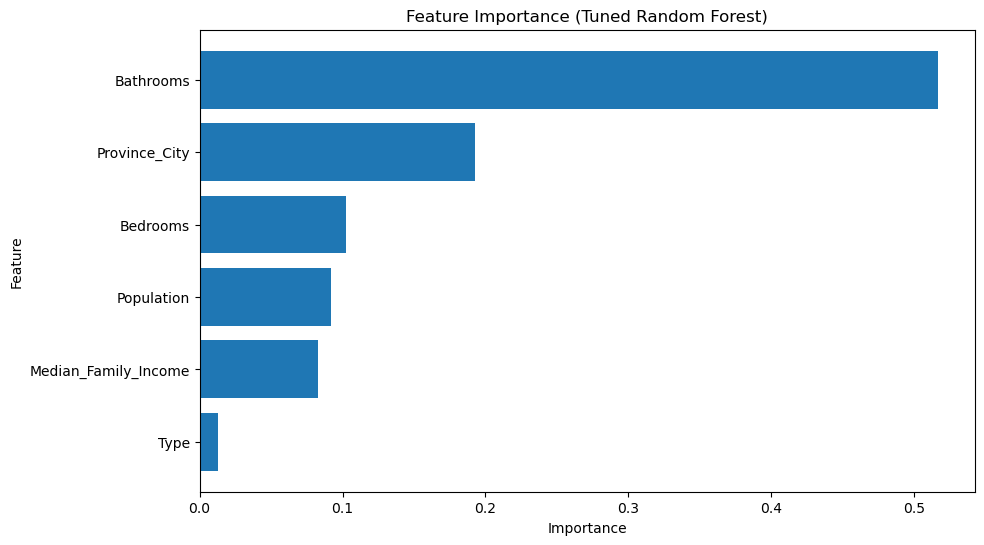

In [35]:
import matplotlib.pyplot as plt

# Feature importance from Random Forest
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_tuned.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Tuned Random Forest)')
plt.gca().invert_yaxis()
plt.show()

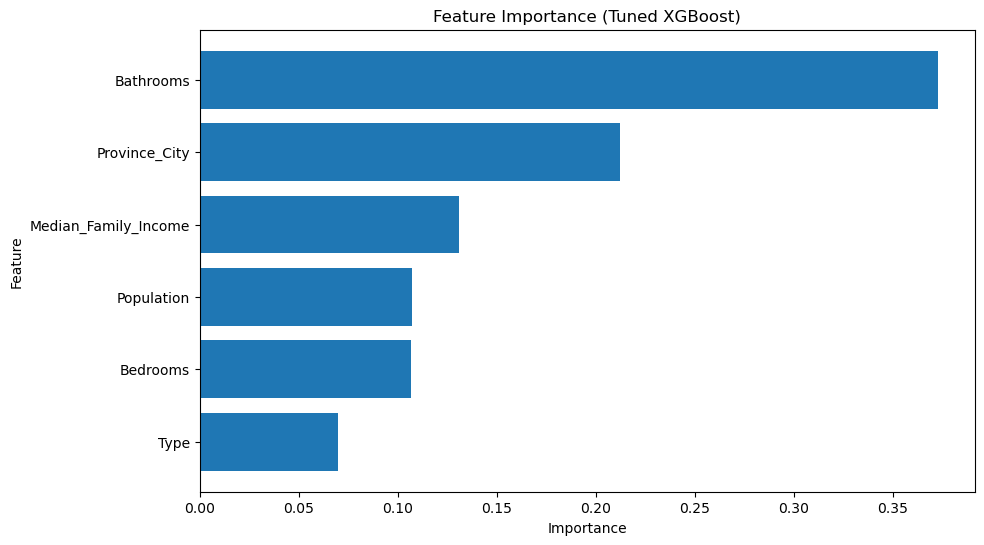

In [68]:
# Feature importance from XGBoost
xgb_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_tuned.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_importances['Feature'], xgb_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Tuned XGBoost)')
plt.gca().invert_yaxis()
plt.show()

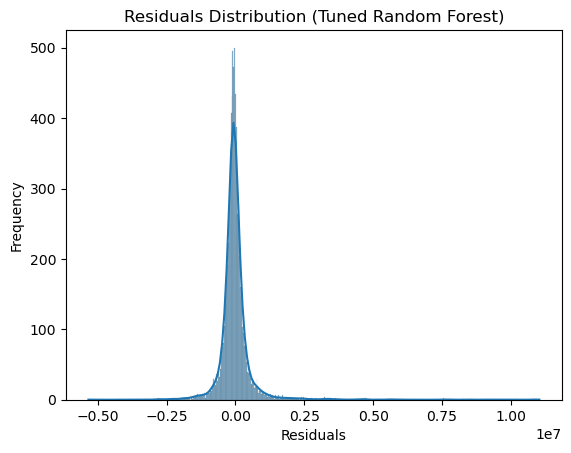

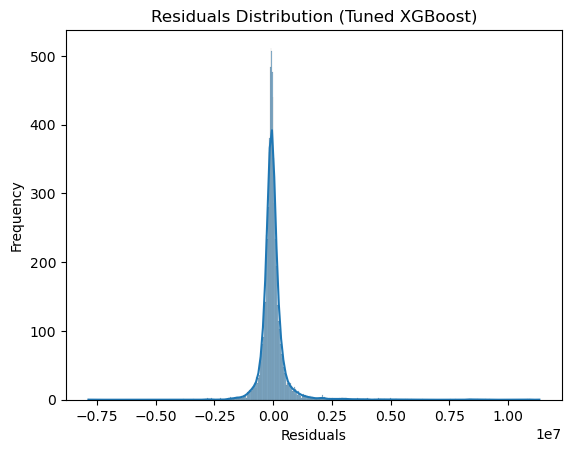

In [36]:
import seaborn as sns

# Residuals for Random Forest
residuals_rf = y_test - y_test_rf_tuned
sns.histplot(residuals_rf, kde=True)
plt.title('Residuals Distribution (Tuned Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals for XGBoost
residuals_xgb = y_test - y_test_xgb_tuned
sns.histplot(residuals_xgb, kde=True)
plt.title('Residuals Distribution (Tuned XGBoost)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter distributions
param_distributions_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions_rf,
                                      n_iter=50, scoring='neg_mean_squared_error',
                                      cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Best parameters and score
best_params_rf_random = random_search_rf.best_params_
best_score_rf_random = random_search_rf.best_score_

print("Best Parameters for Random Forest (Randomized Search):", best_params_rf_random)
print("Best Negative Mean Squared Error (Randomized Search):", best_score_rf_random)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for Random Forest (Randomized Search): {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}
Best Negative Mean Squared Error (Randomized Search): -541342490770.0801


In [38]:
from xgboost import XGBRegressor

# Define parameter distributions
param_distributions_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_distributions_xgb,
                                       n_iter=50, scoring='neg_mean_squared_error',
                                       cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search_xgb.fit(X_train, y_train)

# Best parameters and score
best_params_xgb_random = random_search_xgb.best_params_
best_score_xgb_random = random_search_xgb.best_score_

print("Best Parameters for XGBoost (Randomized Search):", best_params_xgb_random)
print("Best Negative Mean Squared Error (Randomized Search):", best_score_xgb_random)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for XGBoost (Randomized Search): {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best Negative Mean Squared Error (Randomized Search): -532690041777.0644


In [39]:
import numpy as np

# Convert negative MSE to RMSE
best_rmse_rf = np.sqrt(abs(-540619865570.67))
best_rmse_xgb = np.sqrt(abs(-528084593062.14))

print(f"Best RMSE for Random Forest: {best_rmse_rf:.2f}")
print(f"Best RMSE for XGBoost: {best_rmse_xgb:.2f}")


Best RMSE for Random Forest: 735268.57
Best RMSE for XGBoost: 726694.29


In [42]:
import joblib

# Retrain Random Forest with best parameters
rf_final = RandomForestRegressor(
    random_state=42,
    n_estimators=50,
    min_samples_split=5,
    min_samples_leaf=4,
    max_depth=20
)
rf_final.fit(X_train, y_train)

# Evaluate on test set
y_test_rf_final = rf_final.predict(X_test)
test_rmse_rf_final = mean_squared_error(y_test, y_test_rf_final, squared=False)
r2_rf_final = r2_score(y_test, y_test_rf_final)

print("Final Random Forest Results:")
print(f"Test RMSE: {test_rmse_rf_final:.2f}, R^2 Score: {r2_rf_final:.2f}")

# Retrain XGBoost with best parameters
xgb_final = XGBRegressor(
    random_state=42,
    subsample=1.0,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.2,
    colsample_bytree=0.6
)
xgb_final.fit(X_train, y_train)

# Evaluate on test set
y_test_xgb_final = xgb_final.predict(X_test)
test_rmse_xgb_final = mean_squared_error(y_test, y_test_xgb_final, squared=False)
r2_xgb_final = r2_score(y_test, y_test_xgb_final)

print("Final XGBoost Results:")
print(f"Test RMSE: {test_rmse_xgb_final:.2f}, R^2 Score: {r2_xgb_final:.2f}")

joblib.dump(xgb_final, "xgboost_model.pkl")

Final Random Forest Results:
Test RMSE: 654041.22, R^2 Score: 0.49
Final XGBoost Results:
Test RMSE: 666382.11, R^2 Score: 0.48


['xgboost_model.pkl']

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
import joblib

# Load your dataset
# Replace 'data.csv' with your dataset
data = pd.read_csv('combined_data_cleaned.csv')

# Drop irrelevant columns
data.drop(columns=['SqFt', 'Garage', 'Lot_Area', 'Year_Built', 'Address'], inplace=True, errors='ignore')

# Combine Province and City into Province_City
data['Province_City'] = data['Province'] + "_" + data['City'].astype(str)
data.drop(columns=['Province', 'City'], inplace=True)

# Encode categorical columns
le_type = LabelEncoder()
data['Type'] = le_type.fit_transform(data['Type'])

le_province_city = LabelEncoder()
data['Province_City'] = le_province_city.fit_transform(data['Province_City'])

# Define features and target
X = data[['Bedrooms', 'Bathrooms', 'Population', 'Median_Family_Income', 'Province_City', 'Type']]
y = data['Price']

# Standardize numerical features
scaler = StandardScaler()
X[['Bedrooms', 'Bathrooms', 'Population', 'Median_Family_Income']] = scaler.fit_transform(
    X[['Bedrooms', 'Bathrooms', 'Population', 'Median_Family_Income']]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Save the model, encoders, and scaler
joblib.dump(model, 'xgboost_model.pkl')
joblib.dump(le_type, 'type_encoder.pkl')
joblib.dump(le_province_city, 'province_city_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

/var/folders/nq/174f2qcn6cl3hlkkbcr98vw00000gn/T/ipykernel_98480/2130741278.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Bedrooms', 'Bathrooms', 'Population', 'Median_Family_Income']] = scaler.fit_transform(


['scaler.pkl']

In [47]:
# Load the model, encoders, and scaler
loaded_model = joblib.load('xgboost_model.pkl')
le_type = joblib.load('type_encoder.pkl')
le_province_city = joblib.load('province_city_encoder.pkl')
scaler = joblib.load('scaler.pkl')

In [51]:
# User input
user_input = {
    "Bedrooms": 3,
    "Bathrooms": 2,
    "Population": 10000,
    "Median_Family_Income": 75000,
    "Province_City": "Ontario_Toronto",
    "Type": "House"
}

# Encode Province_City and Type
province_city_encoded = le_province_city.transform([user_input['Province_City']])[0]
type_encoded = le_type.transform([user_input['Type']])[0]

# Standardize numerical features
numerical_data = np.array([[user_input['Bedrooms'], user_input['Bathrooms'], user_input['Population'], user_input['Median_Family_Income']]])
scaled_numerical_data = scaler.transform(numerical_data)[0]

# Combine all features
test_data = np.array([np.concatenate((scaled_numerical_data, [province_city_encoded, type_encoded]))])

# Predict the target
prediction = loaded_model.predict(test_data)
print("Predicted Price:", prediction[0])

Predicted Price: 386496.03


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


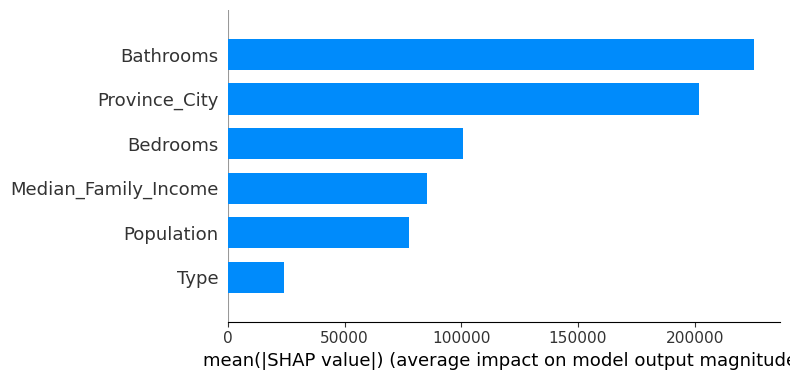

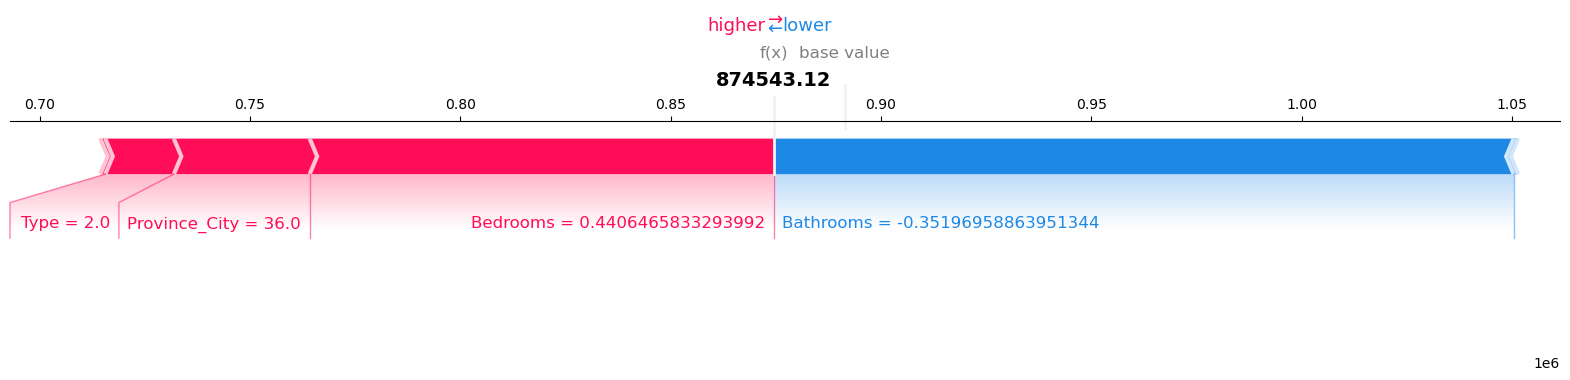

In [52]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.TreeExplainer(loaded_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Global interpretation: Feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Local interpretation: Single prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], matplotlib=True)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Price: 328486.66


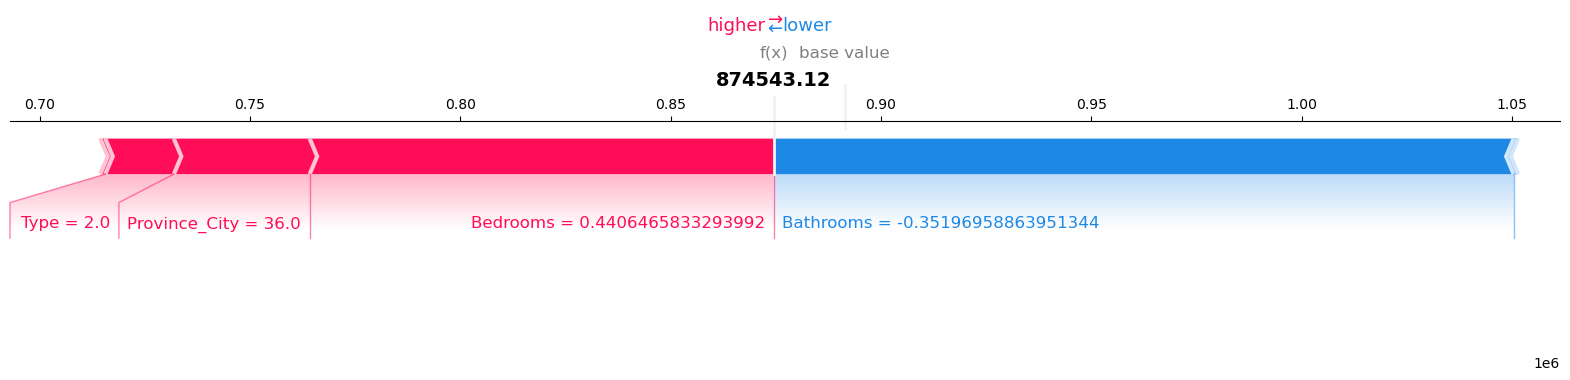

In [50]:
def predict_price(user_input):
    # Encode categorical data
    province_city_encoded = le_province_city.transform([user_input['Province_City']])[0]
    type_encoded = le_type.transform([user_input['Type']])[0]

    # Standardize numerical data
    numerical_data = np.array([[user_input['Bedrooms'], user_input['Bathrooms'], user_input['Population'], user_input['Median_Family_Income']]])
    scaled_numerical_data = scaler.transform(numerical_data)[0]

    # Combine features
    test_data = np.array([np.concatenate((scaled_numerical_data, [province_city_encoded, type_encoded]))])

    # Predict
    prediction = loaded_model.predict(test_data)
    print("Predicted Price:", prediction[0])

    # SHAP insights
    explainer = shap.TreeExplainer(loaded_model)
    shap_values = explainer.shap_values(X_test)
    shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], matplotlib=True)

# Example usage
user_input = {
    "Bedrooms": 3,
    "Bathrooms": 2,
    "Population": 10000,
    "Median_Family_Income": 75000,
    "Province_City": "Ontario_Toronto",
    "Type": "Condo"
}
predict_price(user_input)

In [44]:
import joblib

# Load the trained model
loaded_model = joblib.load("xgboost_model.pkl")
# data.astype(float)

# Example test data (ensure it is preprocessed as explained earlier)
import numpy as np

# Assuming the features are in the correct order after preprocessing
test_data = np.array([[3, 2, 10000, 75000, 15, 2]])  # Replace with actual preprocessed values

# Predict the target (e.g., price)
prediction = loaded_model.predict(test_data)

print("Predicted Price:", prediction)


Predicted Price: [2070504.1]


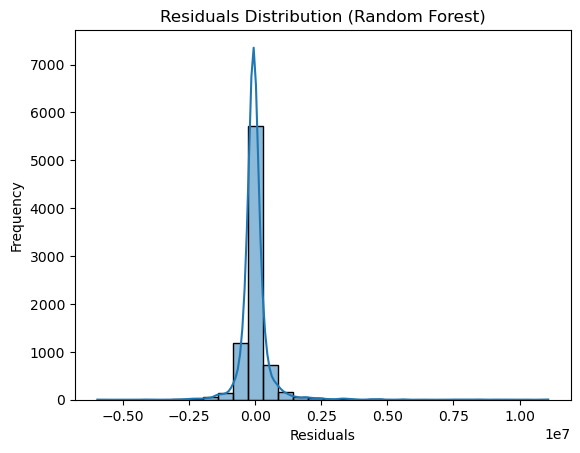

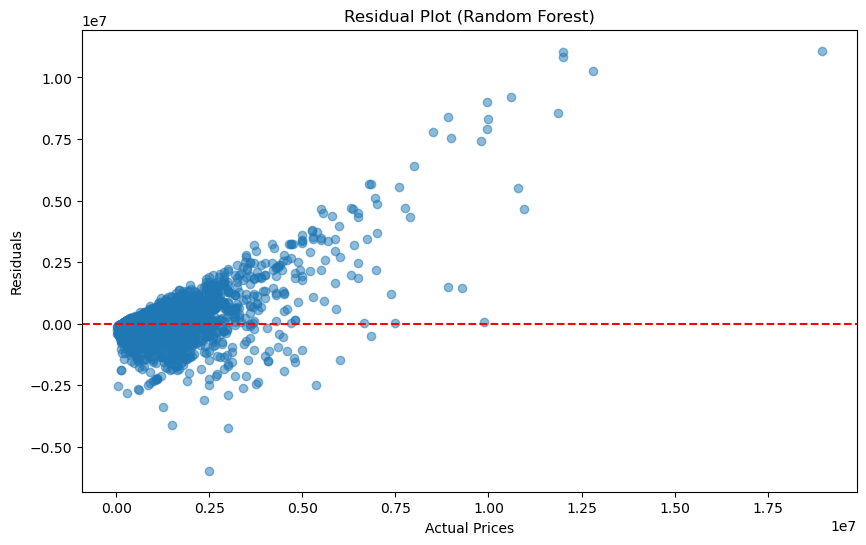

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals_rf = y_test - y_test_rf_final

# Residual distribution
sns.histplot(residuals_rf, kde=True, bins=30)
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()

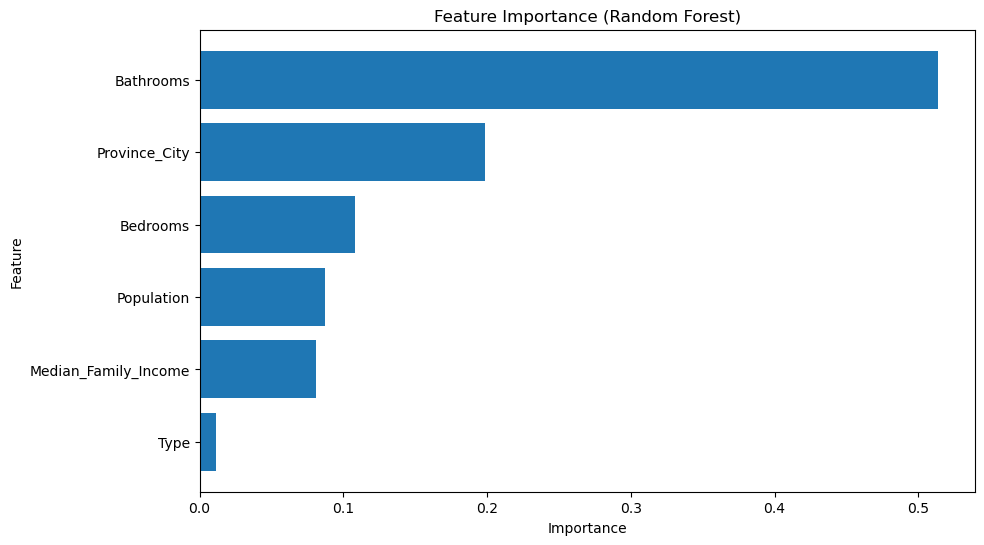

Feature Importances (Random Forest):
                Feature  Importance
1             Bathrooms    0.513570
5         Province_City    0.198237
0              Bedrooms    0.108192
2            Population    0.087215
3  Median_Family_Income    0.081284
4                  Type    0.011501


In [76]:
# Feature importance from Random Forest
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_final.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

# Display feature importance in table format
print("Feature Importances (Random Forest):")
print(feature_importances)

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Results dictionary
results = {
    'Model': [
        'Random Forest', 'Random Forest (GridSearch)', 'Random Forest (RandomizedSearch)',
        'XGBoost', 'XGBoost (GridSearch)', 'XGBoost (RandomizedSearch)'
    ],
    'RMSE': [
        655275.88, 654445.14, 655275.88, 681270.91, 655533.09, 726694.29
    ],
    'R2': [
        0.49, 0.49, 0.49, 0.45, 0.49, 0.45
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

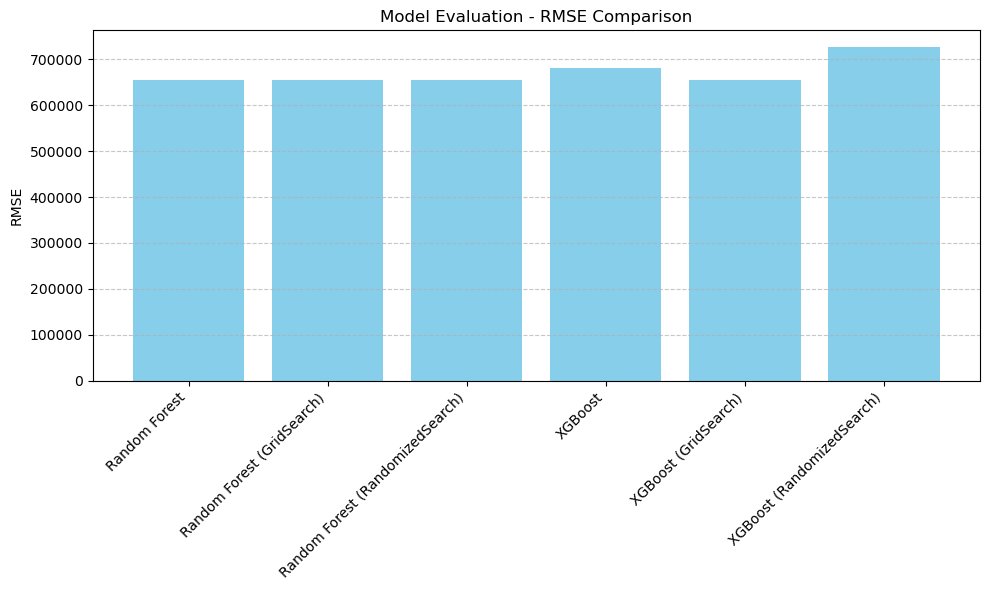

In [78]:
# Plot RMSE
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.title('Model Evaluation - RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

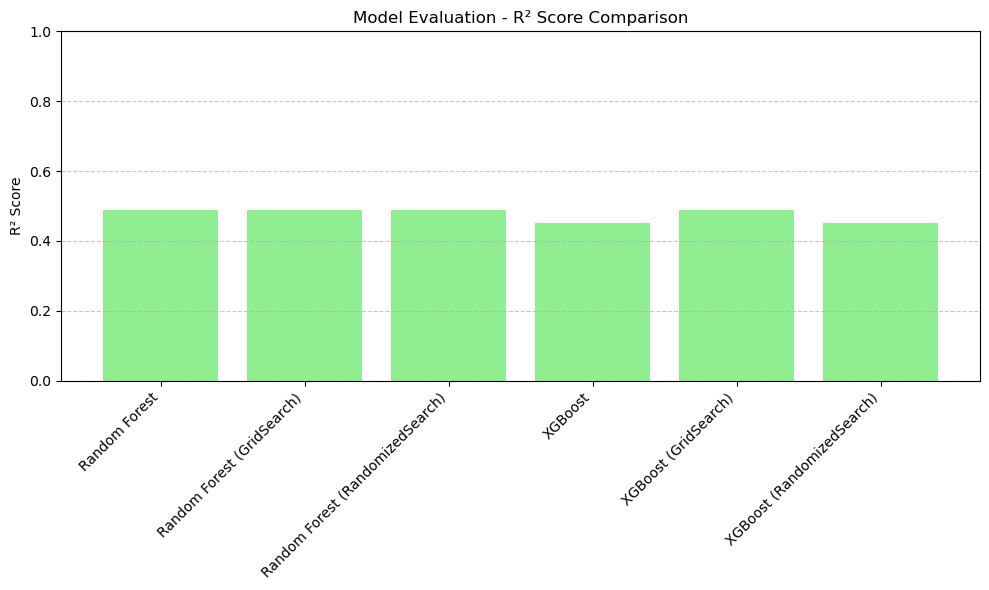

In [79]:
# Plot R²
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R2'], color='lightgreen')
plt.title('Model Evaluation - R² Score Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # R² ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

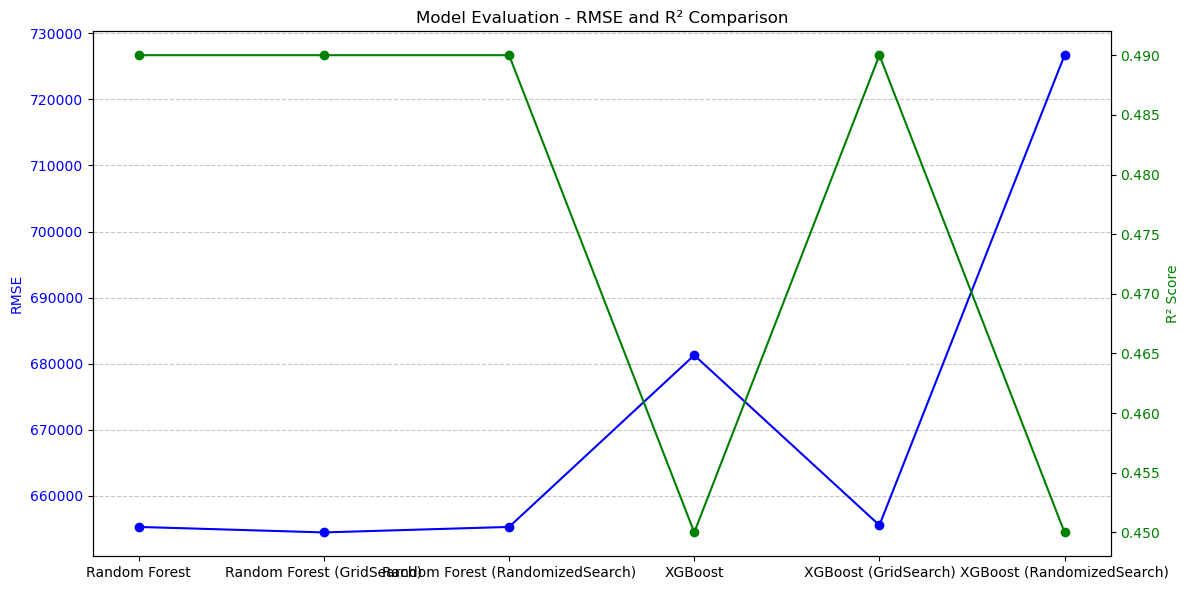

In [81]:
# Line plot for RMSE and R²
fig, ax1 = plt.subplots(figsize=(12, 6))

# RMSE (primary y-axis)
ax1.plot(results_df['Model'], results_df['RMSE'], marker='o', label='RMSE', color='blue')
ax1.set_ylabel('RMSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Model Evaluation - RMSE and R² Comparison')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# R² (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(results_df['Model'], results_df['R2'], marker='o', label='R²', color='green')
ax2.set_ylabel('R² Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Align legends
fig.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


In [82]:
# Calculate the mean of the Price column
mean_price = combined_data['Price'].mean()

# Print the result
print(f"The mean price is: {mean_price}")

The mean price is: 894831.8174744899
